In [1]:
import sys
import numpy
import pandas
import scipy
import matplotlib
import seaborn
import sklearn

print('python version: {}'.format(sys.version))
print('scipy version: {}'.format(scipy.__version__))
print('numpy version: {}'.format(numpy.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('pandas version: {}'.format(pandas.__version__))
print('sklearn version: {}'.format(sklearn.__version__))
print('seaborn version: {}'.format(seaborn.__version__))

python version: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
scipy version: 1.1.0
numpy version: 1.16.2
matplotlib version: 3.0.0
pandas version: 0.23.4
sklearn version: 0.20.3
seaborn version: 0.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset from kaggle
data = pd.read_csv("creditcard.csv")

#explore the data
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(data.shape)

(24999, 31)


In [5]:
print(data.describe)

<bound method NDFrame.describe of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5          2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6          4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7          7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8          7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9          9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10        10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11        10  0.384978  0.616109 -0.874300 -0.094019  

In [6]:
print(data.shape)

(24999, 31)


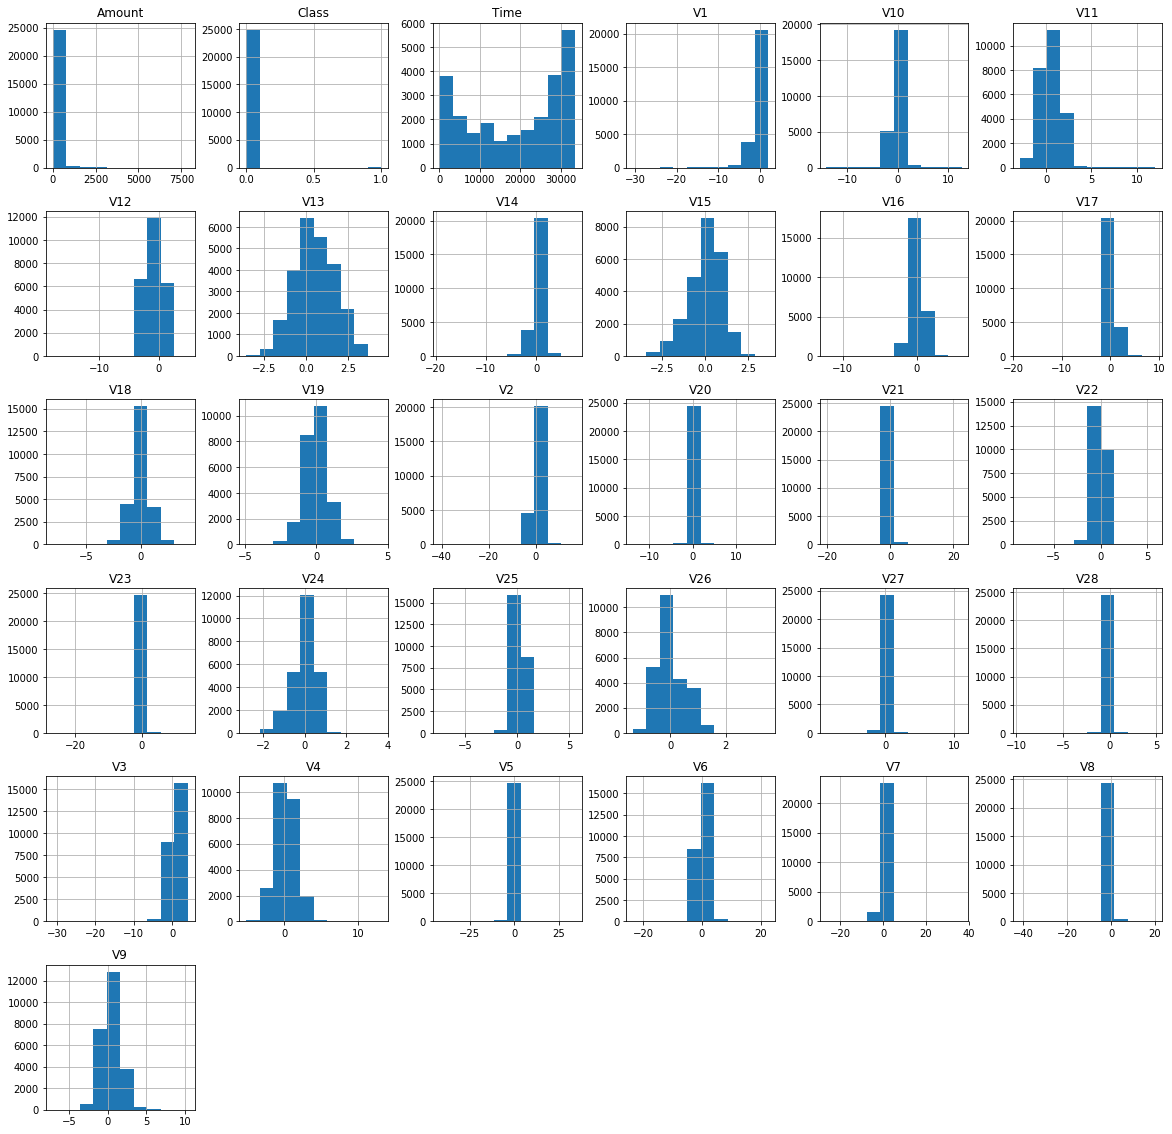

In [7]:
#plot histogram of each parameter
data.hist(figsize=(20, 20))
plt.show()

In [8]:
#find number of fraudulent transactions
fraud = data[data["Class"] == 1]

valid = data[data["Class"] == 0]

outlier_fraction = len(fraud)/float(len(valid))

print(outlier_fraction)

print(len(fraud))
print(len(valid))


0.003532575970454819
88
24911


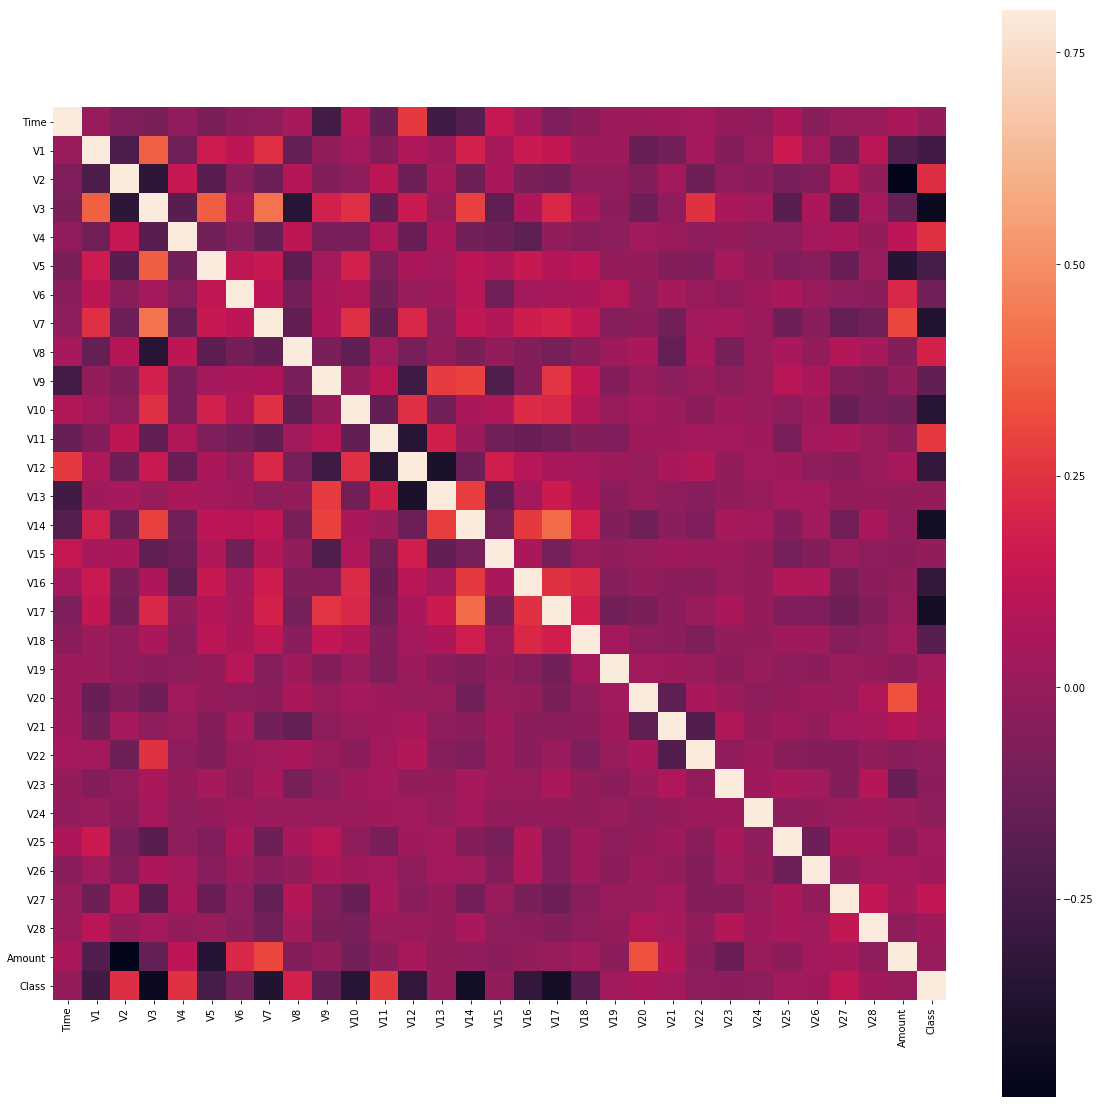

In [9]:
#find correlation
corrmat = data.corr()
fid = plt.figure(figsize = (20,20))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()


In [10]:
#getting all the columns to a list
columns = data.columns.tolist()

#remove column which is insignificant
columns = [c for c in columns if c not in ["Class"]]

#store the variable we want to predict
target = "Class"

X = data[columns]
Y = data["Class"]

#print the shapes
print(X.shape)
print(Y.shape)

(24999, 30)
(24999,)


In [13]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1
#define outlier detection methods

classifiers = {
    "Isolation_Forest": IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local_Outlier_Factor": LocalOutlierFactor(n_neighbors = 20,
                                              contamination = outlier_fraction)
}

In [15]:
#fit the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit the data and taf outliers
    if clf_name == "Local_Outlier_Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
     #reshape the preduction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    
    n_errors = (y_pred != Y).sum()
    
    #run classification metrics
    print('{}: {}'. format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation_Forest: 91
0.9963598543941757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24911
           1       0.48      0.49      0.49        88

   micro avg       1.00      1.00      1.00     24999
   macro avg       0.74      0.74      0.74     24999
weighted avg       1.00      1.00      1.00     24999

Local_Outlier_Factor: 173
0.9930797231889276
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24911
           1       0.02      0.02      0.02        88

   micro avg       0.99      0.99      0.99     24999
   macro avg       0.51      0.51      0.51     24999
weighted avg       0.99      0.99      0.99     24999

